<a href="https://colab.research.google.com/github/valeriarpo/Business-Analytics/blob/main/6_ModeloKNN_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                            #conexión con excel
import numpy as np                             #operaciones matemáticas
import matplotlib.pyplot as plt                #gráficos
import seaborn as sns                          #Para graficar distribuciónes

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.metrics import confusion_matrix           #Matriz de confusión
from sklearn.cluster import KMeans                     #Montoncitos de datos


1. Se cargan los datos

<Figure size 1000x1000 with 0 Axes>

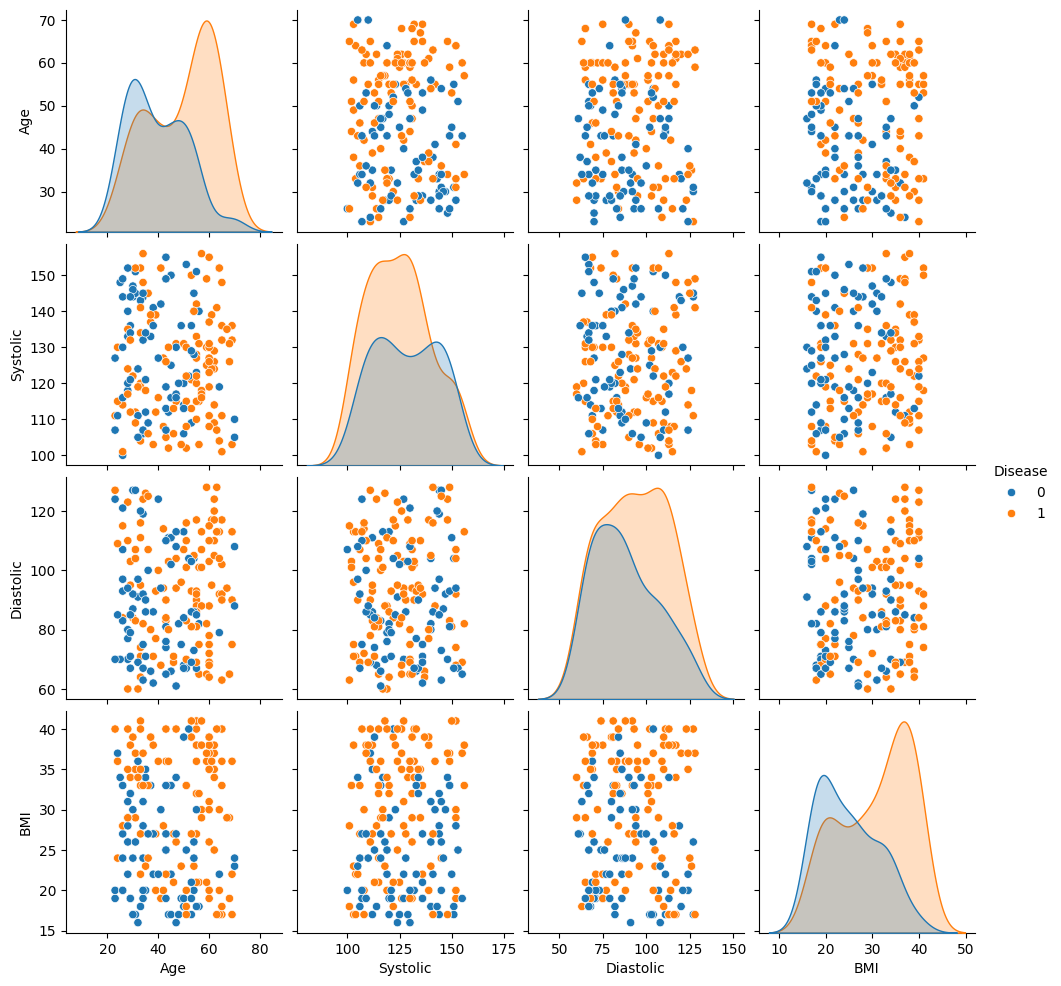

,Disease,Age,Systolic,Diastolic,BMI
Disease,1.000000,0.356533,-0.111110,0.142679,0.382232
Age,0.356533,1.000000,-0.047693,-0.001494,-0.005604
Systolic,-0.111110,-0.047693,1.000000,-0.008109,0.011938
Diastolic,0.142679,-0.001494,-0.008109,1.000000,0.003735
BMI,0.382232,-0.005604,0.011938,0.003735,1.000000


In [ ]:
nxl="/content/3. BD2-HeartData_Int.xlsx"
XDB= pd.read_excel(nxl, sheet_name=0)                          # X data base
XDB=XDB.dropna()
XDB.head(5)

#1. Se selecciona las variables de interes
XDB=XDB[["Disease","Age","Systolic","Diastolic","BMI"]]

#2. Determinar la correlacion entre las variables y su impacto sobre la variable de salida

plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue="Disease")
plt.show()

#3. La correlación numérica es
XDB.corr()

2. Se procede con la implementación del modelo KNN

La matriz de confusión es:
: [[55 18]
 [29 78]]
La exactitud es: 0.7388888888888889
La sensibilidad es: 0.7289719626168224
La especificidad es: 0.7534246575342466
La persona esta: [0]
no va a desarollar una enfermedad


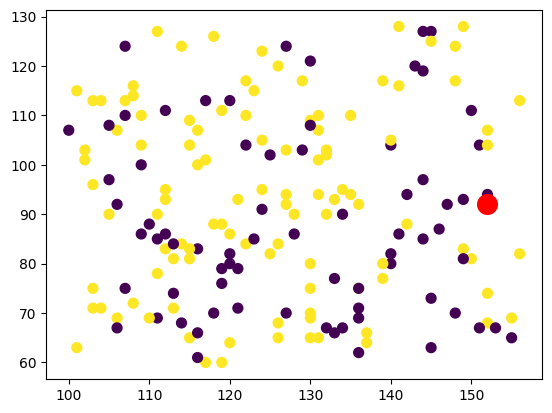

In [ ]:
XD=np.array(XDB[["Age","Systolic","Diastolic","BMI"]])          #Variable entrada
YD=np.array(XDB["Disease"])                                     #Variable Salida

Knn = KNeighborsClassifier(n_neighbors=10)
Knn.fit(XD,YD)

ydp=Knn.predict(XD)

#2. Evaluar el modelo KNN
cm=confusion_matrix(YD,ydp)
print("La matriz de confusión es:\n:", cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad=VP/(VP+FN)
Sensibilidad
Especificidad=VN/(VN+FP)
Especificidad

print("La exactitud es:", Exactitud)
print("La sensibilidad es:", Sensibilidad)
print("La especificidad es:", Especificidad)

#3. Evaluamos si esta enfermo
XDp=np.array([[55,152,92,22]])
ydpp= Knn.predict(XDp)
print("La persona esta:", ydpp)
if ydpp == 1:
  print("va a desarollar una enfermedad")
else:
  print("no va a desarollar una enfermedad")

#Donde se encuentra esta persona
plt.figure()

plt.scatter(XD[:,1],XD[:,2],c=YD,s=50,cmap="viridis")                              #Grafico de correlacion entre ing y egre > correl
plt.scatter(XDp[:,1],XDp[:,2],marker="o", s=200, facecolors="red")
plt.show()

**Modelo K-Means**

1. Se procede con la implementación del modelo

In [ ]:
np.random.seed(42)             #Vamos a tomar las mismas semillas

#1. Construimos el modelo K-Means

k=5 #5 motoncitos de datos
mkm= KMeans(n_clusters=k, init="random", random_state=42)
mkm.fit(XD, YD)
labels=mkm.labels_                   #Esto indica el lugar en donde cayo cada persona
centroids=mkm.cluster_centers_
print("los centroides son los siguientes:\n", centroids)                       # 5 grupos de datos, contar filas

plt.scatter(XD[ :,0], XD[ :, 1],,c=labels_,s=50,cmap="viridis" )
#Se trabaja con variables que tengan mayor correlación en este caso ingresos (XD,[,1]) y egresos (XD [,2])
#Tenemos que ubicar al paciente
xd1=np.array([[55,152,92,22]])
ydp1=mkm.predict(xd1)                            #Cae en fila 5 porque se cuenta desde 0
print("La respuesta de la predicción es:", ydp1)
plt.scatter(XD[:,0],XD[:,1],marker= "*", c=mkm.labels_,s=50,cmap="viridis")
plt.scatter(centroids[:,0],centroids[:,1],alpha=0.5, marker= "o", s=5000, facecolors = "grey")

ydpkm=mkm.predict(XDp)
print("El paciente pertenece al grupo:",ydpkm)                               #Cae en fila 5 porque se cuenta desde 0


SyntaxError: invalid syntax (<ipython-input-21-ee6eab05c337>, line 12)

2. Se procede con la caracterización de cada cluster
-Número de personas en cada cluster
-Número de personas por cluster
-Número de negados por cluster

In [ ]:
labels=mkm.labels_
print("los labels son:\n",labels)                       #Esto indica el lugar en donde cayo cada persona

counts_1=np.bincount(labels)
print("los counts son:\n",counts_1)                    #Aparece en orden cantidad de personas en cada categoría

c01=len(np.where((labels==0) & (YD==1))[0])                         #Digame los preaprob dentro del primer cluster
c00=len(np.where((labels==0) & (YD==0))[0])                         #Digame los preneg dentro del primer cluster

print("Las personas del primer cluster aprobadas son:", c01/(c00+c01))
print("Las personas del primer cluster negadas son:", c00/(c00+c01))

c11=len(np.where((labels==1) & (YD==1))[0])                         #Digame los preaprob dentro del segundo cluster
c10=len(np.where((labels==1) & (YD==0))[0])                         #Digame los preneg dentro del segundo cluster
print("Las personas del segundo cluster aprobadas son:", c11/(c10+c11))
print("Las personas del segundo cluster negadas son:", c10/(c10+c11))

c21=len(np.where((labels==2) & (YD==1))[0])                         #Digame los preaprob dentro del tercero cluster
c20=len(np.where((labels==2) & (YD==0))[0])                         #Digame los preneg dentro del tercero cluster
print("Las personas del tercer cluster aprobadas son:", c21/(c20+c21))
print("Las personas del tercer cluster negadas son:", c20/(c20+c21))

c31=len(np.where((labels==3) & (YD==1))[0])                         #Digame los preaprob dentro del 3 cluster
c30=len(np.where((labels==3) & (YD==0))[0])                         #Digame los preneg dentro del 3 cluster
print("Las personas del cuarto cluster aprobadas son:", c31/(c30+c31))
print("Las personas del cuarto cluster negadas son:", c30/(c30+c31))

c41=len(np.where((labels==4) & (YD==1))[0])                         #Digame los preaprob dentro del 3 cluster
c40=len(np.where((labels==4) & (YD==0))[0])                         #Digame los preneg dentro del 3 cluster
print("Las personas del quinto cluster aprobadas son:", c41/(c40+c41))
print("Las personas del quinto cluster negadas son:", c40/(c40+c41))



los labels son:
 [1 3 3 4 4 0 0 3 0 4 2 4 0 2 1 2 2 0 3 0 4 1 2 0 0 4 0 0 0 3 0 1 3 0 1 3 3
 2 4 1 1 0 3 2 2 0 4 2 0 3 2 4 3 1 2 0 2 1 2 0 1 3 1 1 2 1 1 2 3 2 0 1 3 3
 2 3 4 3 1 4 2 0 2 3 3 3 1 3 3 0 4 1 1 0 3 1 2 3 0 4 1 1 4 2 1 1 3 4 3 0 4
 1 0 0 1 2 3 0 2 4 1 1 3 1 1 4 0 3 1 1 3 3 0 3 0 3 0 3 2 3 1 1 3 3 1 3 2 0
 0 0 0 1 3 1 2 0 1 4 3 1 4 1 1 4 2 4 4 4 2 0 4 0 4 2 1 2 1 2 3 0]
los counts son:
 [39 43 31 41 26]
Las personas del primer cluster aprobadas son: 0.3333333333333333
Las personas del primer cluster negadas son: 0.6666666666666666
Las personas del segundo cluster aprobadas son: 0.7441860465116279
Las personas del segundo cluster negadas son: 0.2558139534883721
Las personas del tercer cluster aprobadas son: 0.41935483870967744
Las personas del tercer cluster negadas son: 0.5806451612903226
Las personas del cuarto cluster aprobadas son: 0.8048780487804879
Las personas del cuarto cluster negadas son: 0.1951219512195122
Las personas del quinto cluster aprobadas son: 0.61538461538

**Analisis**
El siguiente modelo analiza personas que tengán o no una enfermedad cardiaca, analizando un total de 180 datos de los cuales 73 (40,556%) no sufren enfermedad cardiaca y 107 (59,4%) tienen una enfermedad cardiaca. El modelo es confiable al analizar todos los datos ya que da una exactitud de 73,8%, la sensibilidad es de 72,89%, lo cual es suficientemente buena para analizar pacientes con enfermedades cardiacas y la especificidad es del 75% siendo muy buena para analizar personas que no tienen enfermedades cardiacas.
Todas las variables tienen una correlación baja la una con la otra, es decir que para analizar si alguien esta enfermo comparando con variables como la edad o systolic, no nos da mucha relación con la enfermedad. Las variables que tienen mayor correlación entre si son BMI y disease, es de 0,38. Al analizar la información del individuo se puede concluir que segun su información, no tiene enfermedad cardiaca

Cluster 4 con mayor edad= 57.9
Cluster 1 con mayor presion sistolica = 143.8
Cluster 3  con menor presion distolica = 77
Cluster 5   menor indice de masa corporal = 26.2

